In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name_vec = ["P_c_I", "P_c_notI", "P_b_I", "P_b_notI"]
j_file = 3
f_name = file_name_vec[j_file]

In [2]:
Radius_list = list(range(10, 500, 50))
N = len(Radius_list)
data_size = N*N
data = []

In [3]:
for R_s in Radius_list:
    for R_b in Radius_list:
        d = np.genfromtxt("D:/Satellites/28GHz/data/regression/Rs_"+str(R_s)+"_Rb_"+str(R_b)+".csv", delimiter=',')
        P_c = d.T[2+j_file]
        nan_idx_not = [j for j in range(len(P_c)) if P_c[j]<0.95 and P_c[j]>0.05]
        y = np.log(1.0/P_c[nan_idx_not] - 1)
        
        tau = np.array(range(-60, 61))
        linear_model=np.polyfit(tau[nan_idx_not], y, 1)
        linear_model_fn=np.poly1d(linear_model)
        slope = linear_model_fn[0]
        intercept = linear_model_fn[1]
        data.append([R_s, R_b, slope, intercept])

In [4]:
data_np = np.array(data)
# save this
print(data_np)

[[ 1.00000000e+01  1.00000000e+01 -2.86705037e+00  1.45304658e-01]
 [ 1.00000000e+01  6.00000000e+01 -2.78680384e+00  1.42844605e-01]
 [ 1.00000000e+01  1.10000000e+02 -2.66517615e+00  1.39346730e-01]
 [ 1.00000000e+01  1.60000000e+02 -2.88262175e+00  1.44217597e-01]
 [ 1.00000000e+01  2.10000000e+02 -2.72091555e+00  1.39543894e-01]
 [ 1.00000000e+01  2.60000000e+02 -2.96262295e+00  1.50885894e-01]
 [ 1.00000000e+01  3.10000000e+02 -2.75823494e+00  1.45677134e-01]
 [ 1.00000000e+01  3.60000000e+02 -2.99861456e+00  1.49714587e-01]
 [ 1.00000000e+01  4.10000000e+02 -2.71101460e+00  1.36734811e-01]
 [ 1.00000000e+01  4.60000000e+02 -2.87977763e+00  1.45335785e-01]
 [ 6.00000000e+01  1.00000000e+01 -2.76756974e+00  1.43440127e-01]
 [ 6.00000000e+01  6.00000000e+01 -2.77208297e+00  1.41364194e-01]
 [ 6.00000000e+01  1.10000000e+02 -2.82330118e+00  1.48467393e-01]
 [ 6.00000000e+01  1.60000000e+02 -2.80023930e+00  1.46052891e-01]
 [ 6.00000000e+01  2.10000000e+02 -2.95726318e+00  1.46118827e

In [5]:
import pandas as pd

data_dict = {'R_s':  data_np.T[0],
             'R_b': data_np.T[1],
             'slope': data_np.T[3],
             'intercept': data_np.T[2]}

df = pd.DataFrame(data_dict)

print(df)

      R_s    R_b     slope  intercept
0    10.0   10.0  0.145305  -2.867050
1    10.0   60.0  0.142845  -2.786804
2    10.0  110.0  0.139347  -2.665176
3    10.0  160.0  0.144218  -2.882622
4    10.0  210.0  0.139544  -2.720916
..    ...    ...       ...        ...
95  460.0  260.0  0.140439  -2.734586
96  460.0  310.0  0.151107  -2.924673
97  460.0  360.0  0.141757  -2.750267
98  460.0  410.0  0.146716  -2.811712
99  460.0  460.0  0.150600  -2.855750

[100 rows x 4 columns]


### Filter out the NaN values

In [6]:
df_2 = df[ np.logical_not(np.isnan(df["slope"]))]
print(df_2)
df_2.to_csv("D:/Satellites/28GHz/data/fits/"+f_name+"_slopes.csv")

      R_s    R_b     slope  intercept
0    10.0   10.0  0.145305  -2.867050
1    10.0   60.0  0.142845  -2.786804
2    10.0  110.0  0.139347  -2.665176
3    10.0  160.0  0.144218  -2.882622
4    10.0  210.0  0.139544  -2.720916
..    ...    ...       ...        ...
95  460.0  260.0  0.140439  -2.734586
96  460.0  310.0  0.151107  -2.924673
97  460.0  360.0  0.141757  -2.750267
98  460.0  410.0  0.146716  -2.811712
99  460.0  460.0  0.150600  -2.855750

[100 rows x 4 columns]


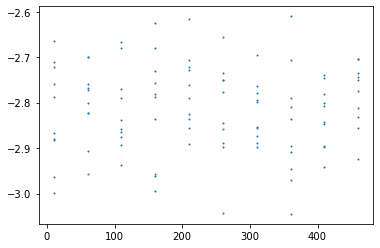

In [7]:
plt.scatter(data_np.T[0], data_np.T[2], s=1)

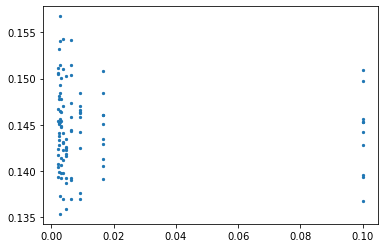

In [8]:
plt.scatter(np.power(data_np.T[0], -1), data_np.T[3], s=5)

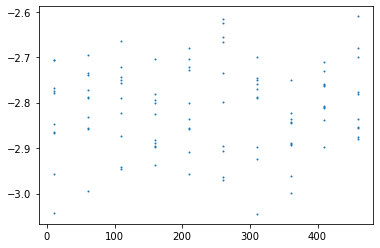

In [9]:
plt.scatter(data_np.T[1], data_np.T[2], s=1)

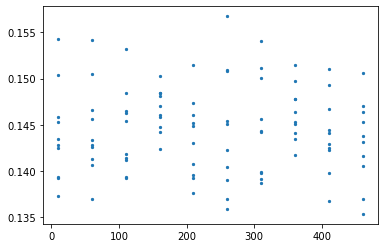

In [10]:
plt.scatter(data_np.T[1], data_np.T[3], s=5)

Text(0.5, 0, 'R_b')

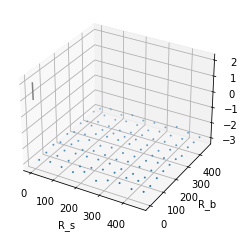

In [11]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(1, 2, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(data_np.T[0], data_np.T[1], data_np.T[2], cmap='Greens', s=1);
plt.xlabel("R_s")
plt.ylabel("R_b")

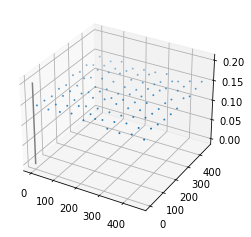

In [12]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 0.2, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(data_np.T[0], data_np.T[1], data_np.T[3], cmap='Greens', s=1);

In [13]:
R_s = 10
R_b = 10
d = np.genfromtxt("D:/Satellites/28GHz/data/regression/Rs_"+str(R_s)+"_Rb_"+str(R_b)+".csv", delimiter=',')
P_c = d.T[2+j_file]

In [14]:
df = pd.read_csv("D:/Satellites/28GHz/data/fits/"+f_name+"_slopes.csv")

In [15]:
entry = df[(df["R_s"]==R_s) & ( df["R_b"]==R_b)]

In [16]:
slope_val  = float(entry["slope"])
intercept_val  = float(entry["intercept"])

In [17]:
tau = np.array(range(-60, 61), dtype='float64')

In [18]:
y_val = 1.0/(1 + np.exp(slope_val*tau + intercept_val))

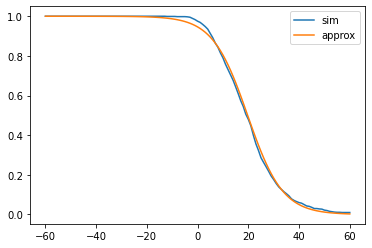

In [19]:
plt.figure()
plt.plot(tau, P_c, label="sim")
plt.plot(tau, y_val, label="approx")
plt.legend()